ARDRA P S <br>
I-PhD physics.<br>
TIFR, Hyderabad 

# **SVM Classifier for vehicles.**

In this project we have developed a small image data set for vehicles by collecting 10 images of 10 types of vehicles, and applied SVM classfier to perform data-analytics.

In [1]:
from google.colab import drive #importing image of the vehicle from drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from PIL import Image
import matplotlib.pyplot as plt

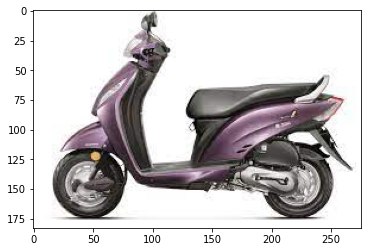

In [4]:
my_img=Image.open('/content/drive/MyDrive/project_vehicle/bike/1.jpeg')
plt.imshow(my_img)
plt.imshow(my_img,cmap='Greys_r')
plt.show()

In [5]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split

Creating an array of all the images

In [6]:
data = "/content/drive/MyDrive/project_vehicle"
Categories = ["airplane","auto","bike","bus","car","heli","horse_cart","ship","tank","train"]
listdata=[]
sX = 40
sY = 40
for category in Categories:
  path=os.path.join(data, category)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    img_array=cv2.resize(img_array,(sX, sY))
    listdata.append([img_array])
    
listdata=np.array(listdata)

In [7]:
print(np.shape(listdata[:,0]))

(100, 40, 40)


In [8]:
print(np.shape(listdata))

(100, 1, 40, 40)


Defining the target or label for the images.

In [9]:
N=[]
for i in range(10):
  for j in range(10):
    N.append(i)


Defining a function to get subpolts of all the images.

In [10]:
def print_vehicles(images, target, top_n):
    fig = plt.figure(figsize=(50,50))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(top_n):
        p = fig.add_subplot(sX,sY,i+1,xticks=[],yticks=[]) # each image is a 20x20 matrix
        p.imshow(images[i,0,:,:], cmap=plt.cm.bone)
        p.text(0,18,str(target[i]))
        p.text(0,60,str(i))
      

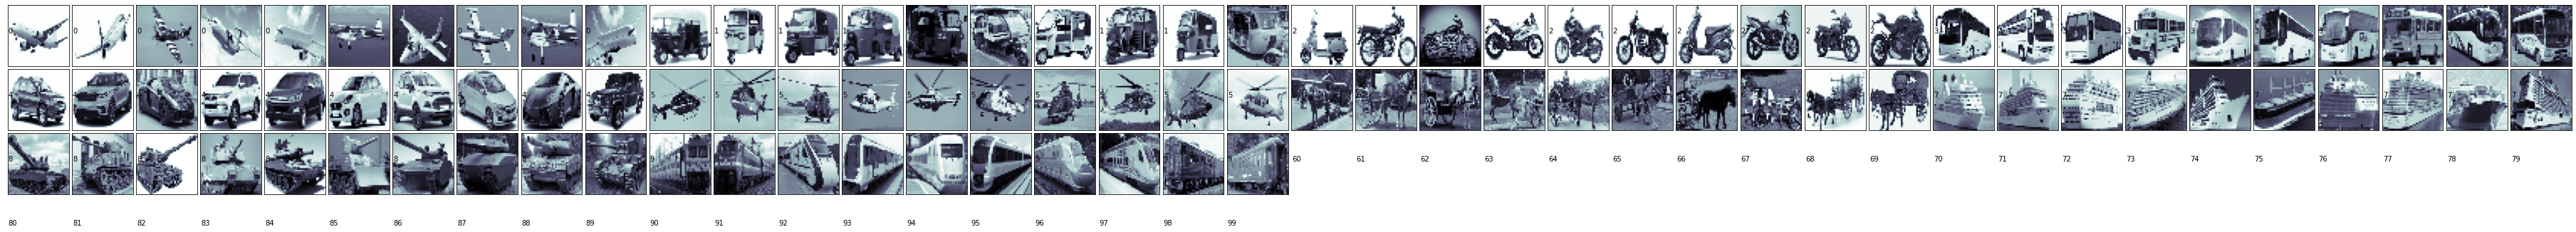

In [11]:
print_vehicles(listdata,N,100 )

In [12]:
 y=listdata.reshape(len(listdata), -1)

In [13]:
print(np.shape(y))

(100, 1600)


Assigning different labels.


In [14]:
##Wheel_counter
##N= The no of wheels

N = np.zeros(100)
N[0:10] = 0
N[10:20] = 3
N[20:30] = 2
N[30:50] = 4
N[50:60] = 0
N[60:70] = 2
N[70:80] = 0
N[80:100] = 50

## '1' for vehicle traveling in air, '2' for vehicle in water body.
#N[0:10] = 1
#N[50:60] =1
#N[70:80] = 2



Splitting the data set into different ratios of test and trainig set.

In [15]:
from sklearn.svm import SVC
#svc_1 = SVC(kernel ='poly')
svc_1 = SVC(kernel ='linear')
#scv_1 = SVC(kernel = 'rbf')
from sklearn.model_selection import train_test_split

test_score1=[]
train_score1=[]
test_size =[0.05,0.2,0.3,0.4,0.5, 0.6, .7, .8, .9, .95]
for i in test_size:
  X_train, X_test, y_train, y_test = train_test_split(y, N, test_size=i, random_state=5)
  svc_1.fit(X_train, y_train)

  train_score=svc_1.score(X_train, y_train)
  print('Score for training set',train_score)
  
  test_score=svc_1.score(X_test, y_test)
  test_score1.append(test_score)
  train_score1.append(train_score)
  print('Score for test set ratio ' + str(i) + " = " + str(test_score)  )
  print('--')
print(test_score1) 
print(train_score1)

Score for training set 1.0
Score for test set ratio 0.05 = 0.8
--
Score for training set 1.0
Score for test set ratio 0.2 = 0.35
--
Score for training set 1.0
Score for test set ratio 0.3 = 0.5333333333333333
--
Score for training set 1.0
Score for test set ratio 0.4 = 0.475
--
Score for training set 1.0
Score for test set ratio 0.5 = 0.5
--
Score for training set 1.0
Score for test set ratio 0.6 = 0.55
--
Score for training set 1.0
Score for test set ratio 0.7 = 0.5428571428571428
--
Score for training set 1.0
Score for test set ratio 0.8 = 0.425
--
Score for training set 1.0
Score for test set ratio 0.9 = 0.3333333333333333
--
Score for training set 1.0
Score for test set ratio 0.95 = 0.3473684210526316
--
[0.8, 0.35, 0.5333333333333333, 0.475, 0.5, 0.55, 0.5428571428571428, 0.425, 0.3333333333333333, 0.3473684210526316]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


PLOT 

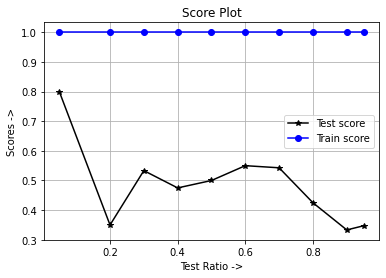

In [17]:
import matplotlib.pyplot as plt
x=test_size
y=test_score1
y1=train_score1
plt.plot(x,y,'k-*', label= 'Test score')
plt.plot(x,y1,'b-o', label= 'Train score')
plt.xlabel('Test Ratio ->')
plt.ylabel('Scores ->')
plt.title('Score Plot')
plt.legend()
plt.grid()
#plt.savefig("A_40_linear_",dpi=200)
plt.show()
